In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre URL cross)(3).csv")
data

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
0,0,9.932018e-01,6.798173e-03,9.932018e-01,6.798173e-03,9.932018e-01,6.798173e-03
1,0,9.999542e-01,4.575603e-05,9.999542e-01,4.575603e-05,9.999542e-01,4.575603e-05
2,0,9.976411e-01,2.358931e-03,9.976411e-01,2.358931e-03,9.976411e-01,2.358931e-03
3,0,9.875554e-01,1.244462e-02,9.875554e-01,1.244462e-02,9.875554e-01,1.244462e-02
4,0,9.999881e-01,1.189933e-05,9.999881e-01,1.189933e-05,9.999881e-01,1.189933e-05
...,...,...,...,...,...,...,...
4647,1,2.401408e-10,1.000000e+00,2.401408e-10,1.000000e+00,2.401408e-10,1.000000e+00
4648,0,9.999578e-01,4.222117e-05,9.999578e-01,4.222117e-05,9.999578e-01,4.222117e-05
4649,0,1.000000e+00,3.341577e-09,1.000000e+00,3.341577e-09,1.000000e+00,3.341577e-09
4650,0,9.983096e-01,1.690386e-03,9.983096e-01,1.690386e-03,9.983096e-01,1.690386e-03


In [4]:
data.shape

(4652, 7)

In [5]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish'],
      dtype='object')

In [6]:
data.describe()

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
count,4652.000000,4.652000e+03,4.652000e+03,4.652000e+03,4.652000e+03,4.652000e+03,4.652000e+03
mean,0.438521,5.681408e-01,4.318592e-01,5.681408e-01,4.318592e-01,5.681408e-01,4.318592e-01
std,0.496259,4.897270e-01,4.897270e-01,4.897270e-01,4.897270e-01,4.897270e-01,4.897270e-01
min,0.000000,0.000000e+00,1.001977e-43,0.000000e+00,1.001977e-43,0.000000e+00,1.001977e-43
25%,0.000000,2.034231e-08,3.945888e-05,2.034231e-08,3.945888e-05,2.034231e-08,3.945888e-05
50%,0.000000,9.973669e-01,2.633116e-03,9.973669e-01,2.633116e-03,9.973669e-01,2.633116e-03
75%,1.000000,9.999605e-01,1.000000e+00,9.999605e-01,1.000000e+00,9.999605e-01,1.000000e+00
max,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 4ms/step - loss: 0.5281 - accuracy: 0.7492 - val_loss: 0.2964 - val_accuracy: 0.9893
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9883 - val_loss: 0.1381 - val_accuracy: 0.9871
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9885 - val_loss: 0.0860 - val_accuracy: 0.9871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9885 - val_loss: 0.0673 - val_accuracy: 0.9871
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9890 - val_loss: 0.0606 - val_accuracy: 0.9850
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9895 - val_loss: 0.0584 - val_accuracy: 0.9850
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9900 - val_loss: 0.0586 - val_accuracy: 0.9850

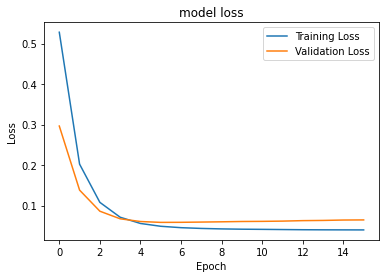

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       265
           1       0.98      0.99      0.98       201

    accuracy                           0.98       466
   macro avg       0.98      0.99      0.98       466
weighted avg       0.99      0.98      0.98       466

Accuracy: 0.9849785407725322
[[260   5]
 [  2 199]]
Precision: 0.9755
Recall: 0.9900
F1 Score: 0.9827
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2351 - accuracy: 0.9529 - val_loss: 0.0754 - val_accuracy: 0.9893
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9888 - val_loss: 0.0355 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9885 - val_loss: 0.0276 - val_accuracy: 0.9936
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9878 - val_loss: 0.0271 

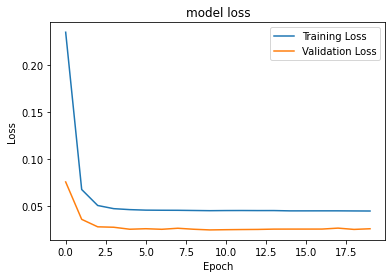

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.99      0.99      0.99       186

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466

Accuracy: 0.9957081545064378
[[279   1]
 [  1 185]]
Precision: 0.9946
Recall: 0.9946
F1 Score: 0.9946
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1870 - accuracy: 0.9699 - val_loss: 0.0521 - val_accuracy: 0.9914
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9883 - val_loss: 0.0420 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9888 - val_loss: 0.0416 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9888 - val_loss: 0.0415 

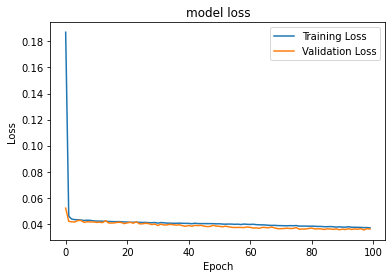

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       261
           1       1.00      0.98      0.99       204

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.989247311827957
[[260   1]
 [  4 200]]
Precision: 0.9950
Recall: 0.9804
F1 Score: 0.9877
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1791 - accuracy: 0.9649 - val_loss: 0.0578 - val_accuracy: 0.9871
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9895 - val_loss: 0.0561 - val_accuracy: 0.9871
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9893 - val_loss: 0.0577 - val_accuracy: 0.9871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9893 - val_loss: 0.0562 -

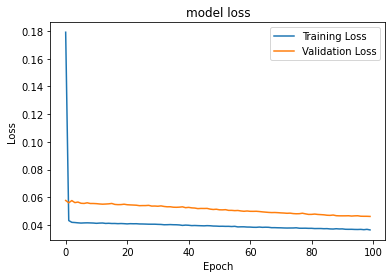

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       256
           1       0.99      0.98      0.99       209

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[254   2]
 [  4 205]]
Precision: 0.9903
Recall: 0.9809
F1 Score: 0.9856
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9465 - val_loss: 0.0320 - val_accuracy: 0.9914
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9890 - val_loss: 0.0217 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9885 - val_loss: 0.0235 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9885 - val_loss: 0.0197 

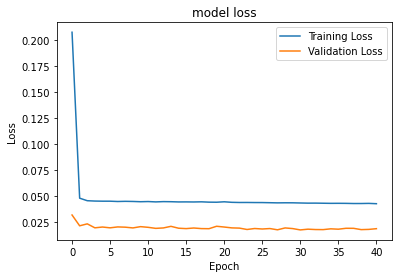

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       264
           1       0.99      1.00      0.99       201

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9913978494623656
[[261   3]
 [  1 200]]
Precision: 0.9852
Recall: 0.9950
F1 Score: 0.9901
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1934 - accuracy: 0.9522 - val_loss: 0.0318 - val_accuracy: 0.9978
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9878 - val_loss: 0.0176 - val_accuracy: 0.9957
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9883 - val_loss: 0.0142 - val_accuracy: 0.9957
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9883 - val_loss: 0.0142 

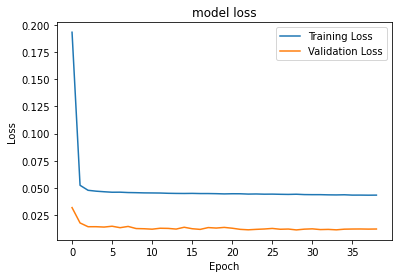

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       205

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9956989247311828
[[259   1]
 [  1 204]]
Precision: 0.9951
Recall: 0.9951
F1 Score: 0.9951
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1871 - accuracy: 0.9537 - val_loss: 0.0485 - val_accuracy: 0.9828
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9888 - val_loss: 0.0398 - val_accuracy: 0.9828
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9897 - val_loss: 0.0384 - val_accuracy: 0.9828
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9893 - val_loss: 0.0385 

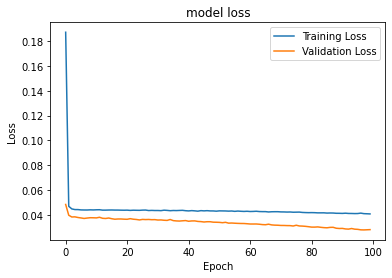

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       260
           1       0.99      0.98      0.98       205

    accuracy                           0.98       465
   macro avg       0.99      0.98      0.98       465
weighted avg       0.99      0.98      0.98       465

Accuracy: 0.9849462365591398
[[258   2]
 [  5 200]]
Precision: 0.9901
Recall: 0.9756
F1 Score: 0.9828
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2070 - accuracy: 0.9374 - val_loss: 0.0847 - val_accuracy: 0.9806
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9900 - val_loss: 0.0844 - val_accuracy: 0.9806
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9900 - val_loss: 0.0837 - val_accuracy: 0.9806
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9904 - val_loss: 0.0898 

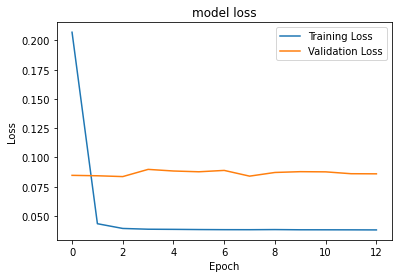

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       226
           1       1.00      0.97      0.98       239

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9806451612903225
[[225   1]
 [  8 231]]
Precision: 0.9957
Recall: 0.9665
F1 Score: 0.9809
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1518 - accuracy: 0.9759 - val_loss: 0.0486 - val_accuracy: 0.9914
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9888 - val_loss: 0.0454 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9885 - val_loss: 0.0449 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9885 - val_loss: 0.0450 

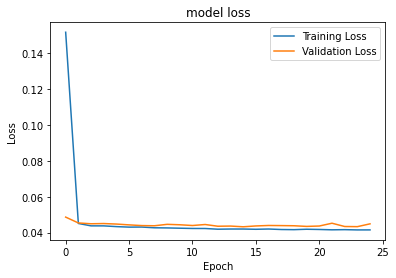

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       273
           1       1.00      0.98      0.99       192

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9913978494623656
[[273   0]
 [  4 188]]
Precision: 1.0000
Recall: 0.9792
F1 Score: 0.9895
Epoch 1/100
131/131 [==============================] - 1s 4ms/step - loss: 0.1818 - accuracy: 0.9790 - val_loss: 0.0549 - val_accuracy: 0.9892
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9893 - val_loss: 0.0478 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9893 - val_loss: 0.0469 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9888 - val_loss: 0.0475 

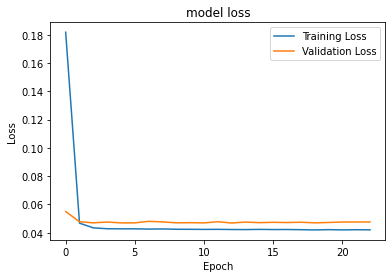

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       267
           1       0.98      0.98      0.98       198

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[264   3]
 [  3 195]]
Precision: 0.9848
Recall: 0.9848
F1 Score: 0.9848
Average Validation Accuracy: 0.98882135769994


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

